In [31]:
import pandas as pd

# Load the combined results CSV file
df = pd.read_csv("hypothesis1_df.csv")

# Adjust burned_area to percentage
grid_size = 50 * 50 * 0.8 # due to water_body_ratio=0.2
df["burned_area_percentage%"] = (df["burned_area"] / grid_size) * 100

# Drop the original burned_area column for cleaner analysis (optional)
# df.drop(columns=["burned_area"], inplace=True)

# Convert duration to day-hour format
def convert_to_day_hour(hours):
    days = hours // 24  # Integer division to get days
    remaining_hours = round(hours % 24)  # Remainder to get hours
    return f"{days} days {remaining_hours} hours"

# Apply the conversion to the duration column
df["duration_day_hour"] = df["duration"].apply(convert_to_day_hour)

# Drop the original duration column if no longer needed (optional)
# df.drop(columns=["duration"], inplace=True)

# Display the first few rows to confirm the change
df


,simulation,burned_area,duration,category,burned_area_percentage%,duration_day_hour
0,1,16,25,fire_at_bush,0.80,1 days 1 hours
1,2,1097,241,fire_at_bush,54.85,10 days 1 hours
2,3,293,68,fire_at_bush,14.65,2 days 20 hours
3,4,831,255,fire_at_bush,41.55,10 days 15 hours
4,5,947,304,fire_at_bush,47.35,12 days 16 hours
...,...,...,...,...,...,...
95,46,466,183,fire_at_non_bush,23.30,7 days 15 hours
96,47,1104,285,fire_at_non_bush,55.20,11 days 21 hours
97,48,999,253,fire_at_non_bush,49.95,10 days 13 hours
98,49,248,189,fire_at_non_bush,12.40,7 days 21 hours


In [33]:
# Group by category
grouped = df.groupby("category")

# Calculate mean and standard deviation for burned area and duration
summary_stats = grouped[["burned_area_percentage%", "duration"]].agg(["mean", "std"])
# Convert the duration mean and std into day-hour format
# summary_stats["duration", "mean"] = summary_stats["duration", "mean"].apply(convert_to_day_hour)
# summary_stats["duration", "std"] = summary_stats["duration", "std"].apply(convert_to_day_hour)

print(summary_stats)


                 burned_area_percentage%            duration            
                                    mean        std     mean         std
category                                                                
fire_at_bush                      30.575  17.683217   165.82  101.289178
fire_at_non_bush                  26.281  21.115757   158.18  100.648244


<Figure size 1000x600 with 0 Axes>

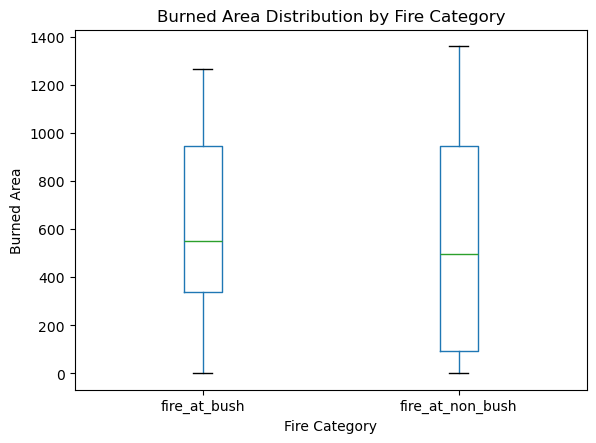

<Figure size 1000x600 with 0 Axes>

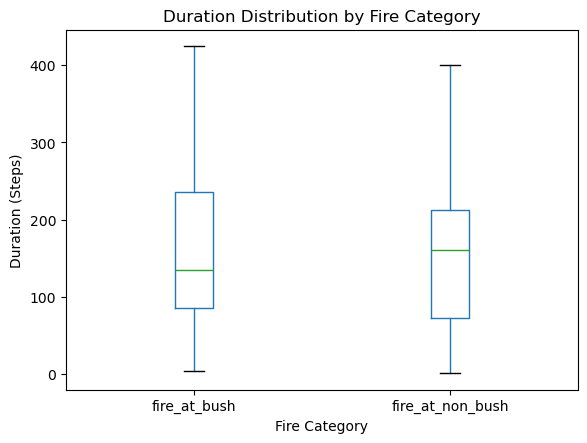

In [5]:
import matplotlib.pyplot as plt

# Box plot for burned area
plt.figure(figsize=(10, 6))
df.boxplot(column="burned_area", by="category", grid=False)
plt.title("Burned Area Distribution by Fire Category")
plt.suptitle("")  # Remove default title
plt.xlabel("Fire Category")
plt.ylabel("Burned Area")
plt.show()

# Box plot for duration
plt.figure(figsize=(10, 6))
df.boxplot(column="duration", by="category", grid=False)
plt.title("Duration Distribution by Fire Category")
plt.suptitle("")  # Remove default title
plt.xlabel("Fire Category")
plt.ylabel("Duration (Steps)")
plt.show()


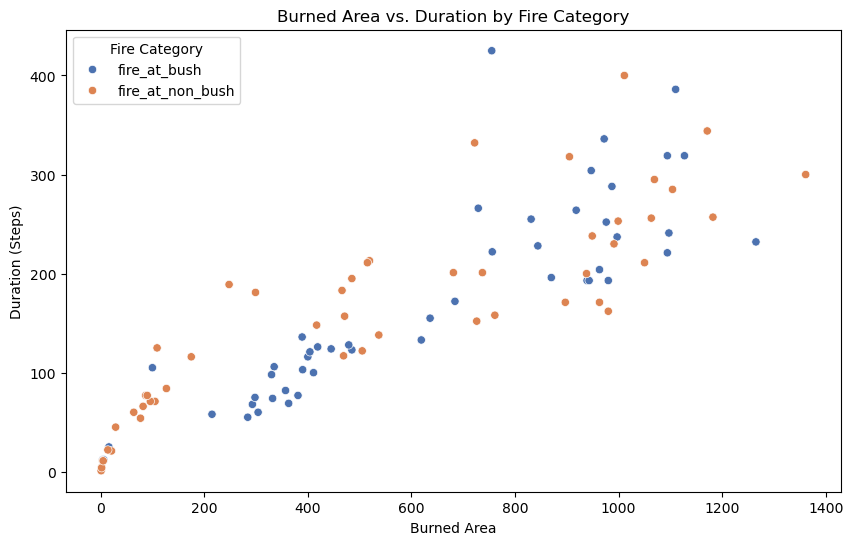

In [20]:
# Scatter plot of burned area vs. duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x="burned_area", y="duration", hue="category", data=df, palette="deep")
plt.title("Burned Area vs. Duration by Fire Category")
plt.xlabel("Burned Area")
plt.ylabel("Duration (Steps)")
plt.legend(title="Fire Category")
plt.show()
